In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

In [4]:
print("Series", series)

Series [-0.01840922  0.11181536  0.15411944  0.38306077  0.26225554  0.37972865
  0.63049813  0.58803863  0.7627946   0.86812988  0.87571293  0.86221003
  1.19631851  0.80648879  0.91599054  1.0685354   0.84592674  1.11687951
  1.00973776  0.89416336  0.97584458  0.90975132  0.74815451  0.6667734
  0.73032857  0.61638321  0.60363501  0.32266817  0.35486853  0.19892632
  0.06721676  0.02129864  0.08476784 -0.23742534 -0.3062543  -0.35305786
 -0.4522713  -0.65312919 -0.53969896 -0.51631898 -0.63459789 -0.85701996
 -0.84140805 -0.92693933 -1.04870014 -1.04909505 -0.98370843 -1.00341894
 -0.97720624 -0.79291243 -1.29019075 -0.86371948 -0.75702809 -1.00566481
 -0.72007498 -0.83613888 -0.63223452 -0.40591061 -0.54621172 -0.27673878
 -0.28605742 -0.18729238 -0.13577526 -0.19800385 -0.13089439  0.28617977
  0.19895835  0.58003522  0.48720666  0.55905902  0.71703251  0.81045191
  0.75821804  0.9104286   0.861249    0.99106165  0.92006707  1.09000554
  1.10805393  1.15859861  1.11901689  0.99774

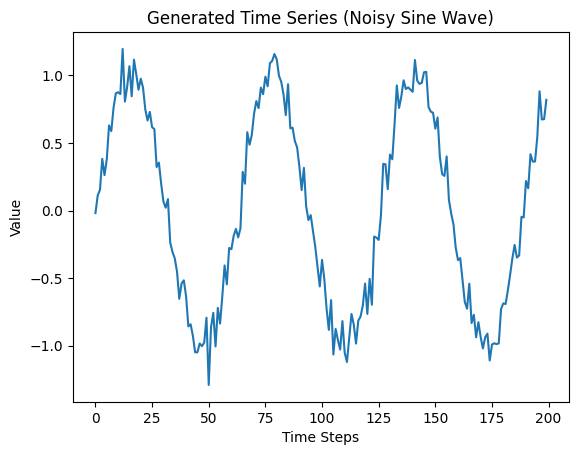

In [5]:
plt.plot(series)
plt.title("Generated Time Series (Noisy Sine Wave)")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.show()

In [6]:
T = 10
D = 1
K = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t : t+T]
  y = series[t + T]
  X.append(x)
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)

print("Shape of X", X.shape)
print("Shape of Y", Y.shape)


Shape of X (190, 10, 1)
Shape of Y (190,)


In [7]:
print(X)

[[[-0.01840922]
  [ 0.11181536]
  [ 0.15411944]
  ...
  [ 0.58803863]
  [ 0.7627946 ]
  [ 0.86812988]]

 [[ 0.11181536]
  [ 0.15411944]
  [ 0.38306077]
  ...
  [ 0.7627946 ]
  [ 0.86812988]
  [ 0.87571293]]

 [[ 0.15411944]
  [ 0.38306077]
  [ 0.26225554]
  ...
  [ 0.86812988]
  [ 0.87571293]
  [ 0.86221003]]

 ...

 [[-0.33212274]
  [-0.04611779]
  [-0.05081148]
  ...
  [ 0.36313647]
  [ 0.54457462]
  [ 0.88276958]]

 [[-0.04611779]
  [-0.05081148]
  [ 0.21893077]
  ...
  [ 0.54457462]
  [ 0.88276958]
  [ 0.6741656 ]]

 [[-0.05081148]
  [ 0.21893077]
  [ 0.16503801]
  ...
  [ 0.88276958]
  [ 0.6741656 ]
  [ 0.67655121]]]


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam


In [27]:
i = Input(shape = (T,1))
x = SimpleRNN(5, activation='tanh')(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(loss = 'mse', optimizer=Adam(learning_rate=0.1))

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 10, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 5)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
X_train = X[:-N//2]
Y_train = Y[:-N//2]
X_val = X[-N//2:]
Y_val = Y[-N//2:]

print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"X_val shape: {X_val.shape}, Y_val shape: {Y_val.shape}")

X_train shape: (95, 10, 1), Y_train shape: (95,)
X_val shape: (95, 10, 1), Y_val shape: (95,)


In [29]:
r = model.fit(X_train, Y_train, epochs=80, validation_data=(X_val, Y_val))

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 474ms/step - loss: 1.1401 - val_loss: 0.1036
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0664 - val_loss: 0.0636
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0605 - val_loss: 0.0730
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0491 - val_loss: 0.0437
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0437 - val_loss: 0.0448
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0411 - val_loss: 0.0400
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0491 - val_loss: 0.0361
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0468 - val_loss: 0.0379
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0394 - val_loss: 0.0323
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0339 - val_loss: 0.0313
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0330 - val_loss: 0.0328
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0329 - val_loss: 0.0309


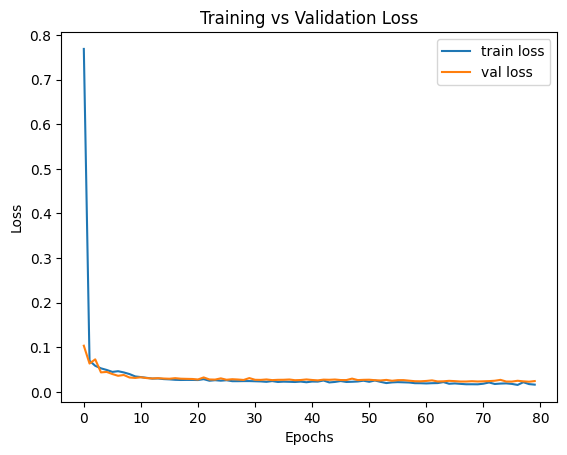

In [30]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [31]:
Y_pred = model.predict(X_val)

for i in range(5):
    print(f"Actual: {Y_val[i]}, Predicted: {Y_pred[i][0]}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step
Actual: -1.065391699888889, Predicted: -0.797706127166748
Actual: -0.8759827843649142, Predicted: -0.9491073489189148
Actual: -0.9574569299217435, Predicted: -0.9040428996086121
Actual: -1.0281551009296415, Predicted: -0.9545261263847351
Actual: -0.8178667967755995, Predicted: -0.6993914246559143


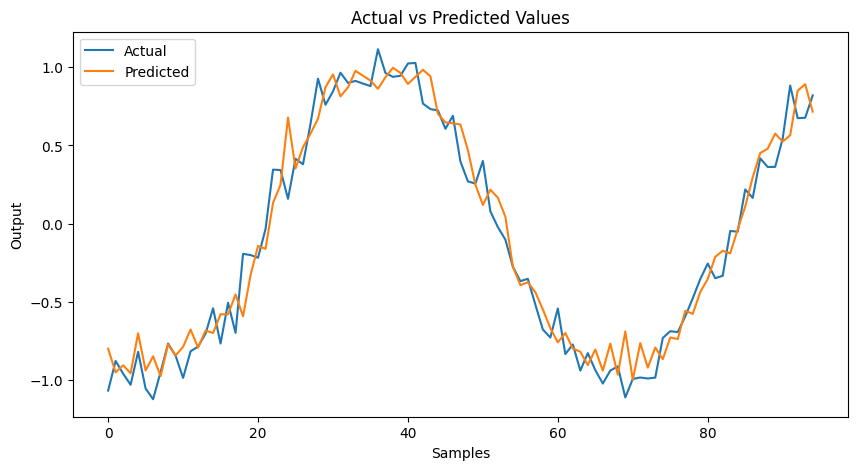

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(Y_val, label='Actual')
plt.plot(Y_pred, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Output')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()
